In [154]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys 
    

class LinearRegression() :
    def __init__( self, learning_rate, epochs ) :
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses=[]
        
    def init_params(self,X,Y):
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
    def forward(self,X):
        return X.dot( self.W ) + self.b
    
    def loss(self,y,y_pred,loss="MSE"):
        mse=np.square(np.subtract(y,y_pred)).mean()
        if loss=="MSE":
            return mse
        elif loss=="RMSE":
            return np.sqrt(mse)
    def cal_acc(self,output,y_true):

        output=np.where(output<=0,-1,1)

        acc=np.mean(output==y_true)
        return acc 
    
        
    def backward(self,y_pred,y):
        Y_pred =y_pred

        # calculate gradients 

        
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def fit( self, X, Y ) :

        batch_data=[]
        y_true=[]
        for i in range(X.shape[0]):
            if i%20==0:
                batch_data.append(X[i:i+20,:])
                y_true.append(Y[i:i+20])
        self.init_params(batch_data[0],y_true[0])
        print(len(batch_data))
        print(len(y_true))
        for j in range(2):
            for epoch in range(self.epochs):
                output=self.forward(batch_data[epoch])
                #print(output.shape)

                loss=self.loss(y_true[epoch],output,loss="RMSE")
                self.losses.append(loss)

                #acc=self.cal_acc(output,y_true[epoch])
                self.backward(output,y_true[epoch])
                acc=self.cal_acc(output,y_true[epoch])
                if epoch %101==0:
                    print("Epoch-->",epoch," Loss: ",loss," Acc: ",acc)
    #                 if epoch==2999:
    #                     print(output,y_true[epoch])
        self.plot_loss()
            
    def plot_loss(self):
        plt.plot(self.losses)
        plt.show()
 
    def predict( self, x ,y) :
        output=self.forward(x)
        loss=self.loss(y,output,loss="RMSE")
        self.losses.append(loss)
        self.plot_loss()
        return output





In [155]:
def dataset():
    df_original = pd.read_csv('mldata.csv')
    df = df_original.copy()

    df = df[['having_IPhaving_IP_Address', 'URLURL_Length',
        'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
        'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
        'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
        'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
        'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
        'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
        'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
        'Statistical_report','Result']]
    x = np.array(df.drop(['Result'],1))
    y = np.array(df['Result'])
    return x, y

369
369
Epoch--> 0  Loss:  1.0  Acc:  0.45
Epoch--> 101  Loss:  0.9984407943745105  Acc:  0.85
Epoch--> 202  Loss:  0.9966469554394205  Acc:  0.85
Epoch--> 303  Loss:  0.99673818768863  Acc:  0.75
Epoch--> 0  Loss:  0.9935889762795317  Acc:  0.9
Epoch--> 101  Loss:  0.9930560190742295  Acc:  0.85
Epoch--> 202  Loss:  0.9908366710743308  Acc:  0.85
Epoch--> 303  Loss:  0.9929966589784744  Acc:  0.75


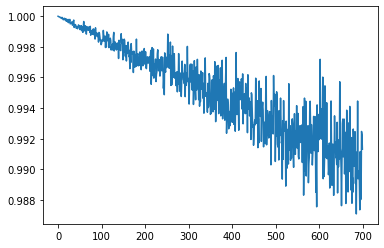

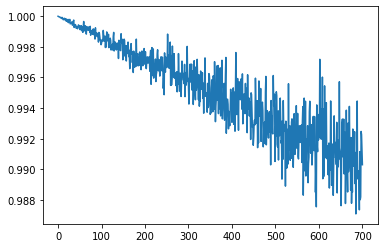

In [162]:
def main():
    # get dataset
    x, y = dataset()

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 1/3, random_state = 0 )

    model = LinearRegression( epochs = 350, learning_rate = 1e-5 )
    model.fit( X_train, Y_train )
    
    Y_pred = model.predict( X_test ,Y_test)


if __name__ == "__main__":
    main()